学习R语言广义线性模型GLM。

# Logistic回归

## Logistic回归

In [1]:
install.packages ("AER")

package 'AER' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\RtmpiOX7vg\downloaded_packages


In [2]:
data(Affairs, package = "AER")
summary(Affairs)

    affairs          gender         age         yearsmarried    children 
 Min.   : 0.000   female:315   Min.   :17.50   Min.   : 0.125   no :171  
 1st Qu.: 0.000   male  :286   1st Qu.:27.00   1st Qu.: 4.000   yes:430  
 Median : 0.000                Median :32.00   Median : 7.000            
 Mean   : 1.456                Mean   :32.49   Mean   : 8.178            
 3rd Qu.: 0.000                3rd Qu.:37.00   3rd Qu.:15.000            
 Max.   :12.000                Max.   :57.00   Max.   :15.000            
 religiousness     education       occupation        rating     
 Min.   :1.000   Min.   : 9.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:14.00   1st Qu.:3.000   1st Qu.:3.000  
 Median :3.000   Median :16.00   Median :5.000   Median :4.000  
 Mean   :3.116   Mean   :16.17   Mean   :4.195   Mean   :3.932  
 3rd Qu.:4.000   3rd Qu.:18.00   3rd Qu.:6.000   3rd Qu.:5.000  
 Max.   :5.000   Max.   :20.00   Max.   :7.000   Max.   :5.000  

In [11]:
Affairs$ynaffair[Affairs$affairs > 0] <- 1
Affairs$ynaffair[Affairs$affairs == 0] <- 0

Affairs$ynaffair <- factor(Affairs$ynaffair, levels=c(0, 1), labels = c("No", "Yes"))
table(Affairs$ynaffair)


 No Yes 
451 150 

In [12]:
fit.full <- glm(
    ynaffair~gender+age+yearsmarried+children+religiousness+education+occupation+rating,
    data=Affairs,
    family=binomial()
)

summary(fit.full)


Call:
glm(formula = ynaffair ~ gender + age + yearsmarried + children + 
    religiousness + education + occupation + rating, family = binomial(), 
    data = Affairs)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.37726    0.88776   1.551 0.120807    
gendermale     0.28029    0.23909   1.172 0.241083    
age           -0.04426    0.01825  -2.425 0.015301 *  
yearsmarried   0.09477    0.03221   2.942 0.003262 ** 
childrenyes    0.39767    0.29151   1.364 0.172508    
religiousness -0.32472    0.08975  -3.618 0.000297 ***
education      0.02105    0.05051   0.417 0.676851    
occupation     0.03092    0.07178   0.431 0.666630    
rating        -0.46845    0.09091  -5.153 2.56e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 675.38  on 600  degrees of freedom
Residual deviance: 609.51  on 592  degrees of freedom
AIC: 627.51

Number of Fisher Sc

In [13]:
fit.reduced <- glm(
    ynaffair~age+yearsmarried+religiousness+rating,
    data=Affairs,
    family=binomial()
)

summary(fit.reduced)


Call:
glm(formula = ynaffair ~ age + yearsmarried + religiousness + 
    rating, family = binomial(), data = Affairs)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.93083    0.61032   3.164 0.001558 ** 
age           -0.03527    0.01736  -2.032 0.042127 *  
yearsmarried   0.10062    0.02921   3.445 0.000571 ***
religiousness -0.32902    0.08945  -3.678 0.000235 ***
rating        -0.46136    0.08884  -5.193 2.06e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 675.38  on 600  degrees of freedom
Residual deviance: 615.36  on 596  degrees of freedom
AIC: 625.36

Number of Fisher Scoring iterations: 4


In [14]:
anova(fit.reduced, fit.full, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,596,615.3578,NA,NA,NA
2,592,609.5104,4,5.847418,0.2108367


## 解释模型参数

In [15]:
coef(fit.reduced)

(Intercept)           age  yearsmarried religiousness        rating 
   1.93083017   -0.03527112    0.10062274   -0.32902386   -0.46136144

In [16]:
exp(coef(fit.reduced))

(Intercept)           age  yearsmarried religiousness        rating 
    6.8952321     0.9653437     1.1058594     0.7196258     0.6304248

In [17]:
confint(fit.reduced)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.75404303,3.150622807
age,-0.07006400,-0.001854759
yearsmarried,0.04388142,0.158562400
religiousness,-0.50637196,-0.155156981
rating,-0.63741235,-0.288566411


In [21]:
try <- exp(confint(fit.reduced))
try

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),2.1255764,23.3506030
age,0.9323342,0.9981470
yearsmarried,1.0448584,1.1718250
religiousness,0.6026782,0.8562807
rating,0.5286586,0.7493370


## 评价预测变量对结果概率的影响

In [38]:
testdata <- data.frame(
    rating=1:5,
    age=mean(Affairs$age),
    yearsmarried=mean(Affairs$yearsmarried),
    religiousness=mean(Affairs$religiousness)
)

testdata

rating,age,yearsmarried,religiousness
<int>,<dbl>,<dbl>,<dbl>
1,32.48752,8.177696,3.116473
2,32.48752,8.177696,3.116473
3,32.48752,8.177696,3.116473
4,32.48752,8.177696,3.116473
5,32.48752,8.177696,3.116473


In [39]:
testdata$prob <- predict(fit.reduced, newdata=testdata, type="response")
testdata

rating,age,yearsmarried,religiousness,prob
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,32.48752,8.177696,3.116473,0.5302296
2,32.48752,8.177696,3.116473,0.4157377
3,32.48752,8.177696,3.116473,0.3096712
4,32.48752,8.177696,3.116473,0.2204547
5,32.48752,8.177696,3.116473,0.1513079


In [40]:
testdata <- data.frame(
    rating=mean(Affairs$rating),
    age=seq(17, 57, 10),
    yearsmarried=mean(Affairs$yearsmarried),
    religiousness=mean(Affairs$religiousness)
)
testdata$prob <- predict(fit.reduced, newdata=testdata, type="response")
testdata

rating,age,yearsmarried,religiousness,prob
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.93178,17,8.177696,3.116473,0.3350834
3.93178,27,8.177696,3.116473,0.2615373
3.93178,37,8.177696,3.116473,0.1992953
3.93178,47,8.177696,3.116473,0.1488796
3.93178,57,8.177696,3.116473,0.1094738


## 过度离势

In [41]:
deviance(fit.reduced)/df.residual(fit.reduced)

[1] 1.03248

In [42]:
fit <- glm(ynaffair~age+yearsmarried+religiousness+rating, data=Affairs, family=binomial())
fit.od <- glm(ynaffair~age+yearsmarried+religiousness+rating, data=Affairs, family=quasibinomial())
pchisq(summary(fit.od)$dispersion*fit$df.residual, fit$df.residual, lower=F)

[1] 0.340122

# 泊松回归

## 泊松回归

In [31]:
install.packages("robust")

also installing the dependency 'fit.models'




package 'fit.models' successfully unpacked and MD5 sums checked
package 'robust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\RtmpiOX7vg\downloaded_packages


In [32]:
data(breslow.dat, package="robust")
names(breslow.dat)

[1] "ID"    "Y1"    "Y2"    "Y3"    "Y4"    "Base"  "Age"   "Trt"   "Ysum" 
[10] "sumY"  "Age10" "Base4"

In [33]:
summary(breslow.dat[c(6, 7, 8, 10)])

      Base             Age               Trt          sumY       
 Min.   :  6.00   Min.   :18.00   placebo  :28   Min.   :  0.00  
 1st Qu.: 12.00   1st Qu.:23.00   progabide:31   1st Qu.: 11.50  
 Median : 22.00   Median :28.00                  Median : 16.00  
 Mean   : 31.22   Mean   :28.34                  Mean   : 33.05  
 3rd Qu.: 41.00   3rd Qu.:32.00                  3rd Qu.: 36.00  
 Max.   :151.00   Max.   :42.00                  Max.   :302.00  

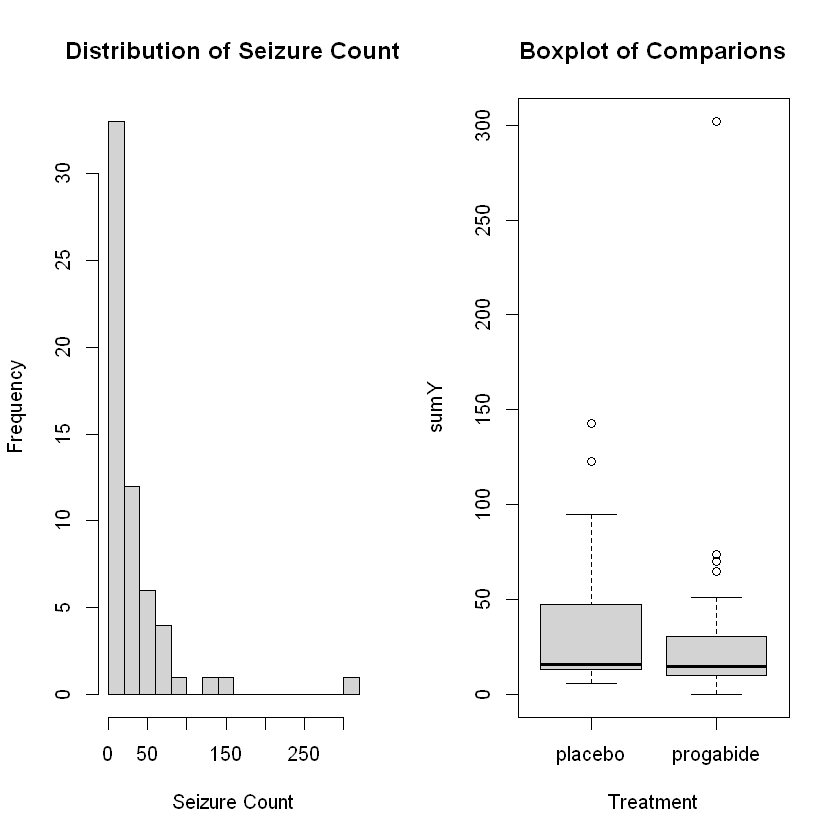

In [34]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(1, 2))
attach(breslow.dat)
hist(sumY, breaks=20, xlab="Seizure Count", main="Distribution of Seizure Count")
boxplot(sumY~Trt, xlab="Treatment", main="Boxplot of Comparions")
par(opar)

In [35]:
fit <- glm(sumY~Base+Age+Trt, data=breslow.dat, family=poisson())
summary(fit)


Call:
glm(formula = sumY ~ Base + Age + Trt, family = poisson(), data = breslow.dat)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.9488259  0.1356191  14.370  < 2e-16 ***
Base          0.0226517  0.0005093  44.476  < 2e-16 ***
Age           0.0227401  0.0040240   5.651 1.59e-08 ***
Trtprogabide -0.1527009  0.0478051  -3.194   0.0014 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2122.73  on 58  degrees of freedom
Residual deviance:  559.44  on 55  degrees of freedom
AIC: 850.71

Number of Fisher Scoring iterations: 5


## 解释模型参数

In [36]:
coef(fit)

(Intercept)         Base          Age Trtprogabide 
  1.94882593   0.02265174   0.02274013  -0.15270095

In [37]:
exp(coef(fit))

(Intercept)         Base          Age Trtprogabide 
   7.0204403    1.0229102    1.0230007    0.8583864

## 过度离势

In [43]:
deviance(fit)/df.residual(fit) 

[1] 1.03248

In [44]:
install.packages("qcc")

package 'qcc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\RtmpiOX7vg\downloaded_packages


In [46]:
library(qcc)
qcc.overdispersion.test(breslow.dat$sumY, type="poisson")

,Obs.Var/Theor.Var,Statistic,p-value
poisson data,62.87013,3646.468,0


In [47]:
fit.od <- glm(sumY~Base+Age+Trt, data=breslow.dat, family=quasipoisson())
summary(fit.od)


Call:
glm(formula = sumY ~ Base + Age + Trt, family = quasipoisson(), 
    data = breslow.dat)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.948826   0.465091   4.190 0.000102 ***
Base          0.022652   0.001747  12.969  < 2e-16 ***
Age           0.022740   0.013800   1.648 0.105085    
Trtprogabide -0.152701   0.163943  -0.931 0.355702    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 11.76075)

    Null deviance: 2122.73  on 58  degrees of freedom
Residual deviance:  559.44  on 55  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


## 拓展

In [52]:
fit <- glm(sumY~Base+Age+Trt, data=breslow.dat, family=poisson, offset=log(time))

ERROR: Error in log(time): non-numeric argument to mathematical function
